In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from itertools import chain, combinations
from collections import defaultdict

In [2]:
!pip install openpyxl

In [3]:
df = pd.read_excel('Online Retail.xlsx')

df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


Дропаем возвраты, они нам не показывают изначальное желание покупки
при этом мы не считам полезность покупки и поэтому не удалям строки с покупками вернувшихся товаров
смотрим только то, что покупают вместе

In [5]:
# Преобразовать значения
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df = df[~df['InvoiceNo'].str.startswith('C')]
df['InvoiceNo'] = df['InvoiceNo'].astype(int)

df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  int64         
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 27.3+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  int64         
 1   StockCode    397924 non-null  object       

In [6]:
# Показать очищенный DataFrame и статистику
df_statistics = df.describe(include='all')

df_statistics

/var/folders/tx/zdp_82ms51z3z9bfb_zz54c80000gn/T/ipykernel_35687/3913287906.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_statistics = df.describe(include='all')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,397924.000000,397924,397924,397924.000000,397924,397924.000000,397924.000000,397924
unique,NaN,3665,3877,NaN,17286,NaN,NaN,37
top,NaN,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-11-14 15:27:00,NaN,NaN,United Kingdom
freq,NaN,2035,2028,NaN,542,NaN,NaN,354345
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,560617.126645,NaN,NaN,13.021823,NaN,3.116174,15294.315171,NaN
std,13106.167695,NaN,NaN,180.420210,NaN,22.096788,1713.169877,NaN
min,536365.000000,NaN,NaN,1.000000,NaN,0.000000,12346.000000,NaN
25%,549234.000000,NaN,NaN,2.000000,NaN,1.250000,13969.000000,NaN


In [7]:
numeric_df = df.select_dtypes(include=[np.number])
C=len(numeric_df.columns)
L=len(numeric_df.index)
CN=numeric_df.count() #количество
NP=((L-CN)/L)*100 #процент пропущенных значений
MN=numeric_df.min() #минимум
Q1=numeric_df.quantile(q=0.25) #первый квартиль
MA=numeric_df.mean() #среднее значение
ME=numeric_df.median() #медиана
Q3=numeric_df.quantile(q=0.75) #третий квартиль
MX=numeric_df.max() #максимум
ST=numeric_df.std() #стандартное отклонение
P=numeric_df.nunique() #мощность
IQ=Q3-Q1 #интерквартильный размах
frame = pd.concat([CN, NP, MN, Q1, MA, ME, Q3, MX, ST, P, IQ], axis=1, join="inner")
frame=frame.T
f=pd.DataFrame(frame)
f.index=['Количество', 'Процент пропусков', 'Минимум', 'Первый квартиль','Среднее', 'Медиана', 'Третий квартиль', 'Максимум','Стандартное отклонение', 'Мощность', 'Интерквартильный размах']
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
f1=f.style.apply(lambda x: ["background-color:tomato" if i==1 else "" for i in x], axis=1, subset=(["Мощность"], slice(None))).apply(lambda x: ["background-color:tomato" if i>=60 else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None))).apply(lambda x: ["background-color:steelblue" if (i<30 and i>0) else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None))).apply(lambda x: ["background-color:limegreen" if i==0 else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None)))
f1

,InvoiceNo,Quantity,UnitPrice,CustomerID
Количество,397924.000000,397924.000000,397924.000000,397924.000000
Процент пропусков,0.000000,0.000000,0.000000,0.000000
Минимум,536365.000000,1.000000,0.000000,12346.000000
Первый квартиль,549234.000000,2.000000,1.250000,13969.000000
Среднее,560617.126645,13.021823,3.116174,15294.315171
Медиана,561893.000000,6.000000,1.950000,15159.000000
Третий квартиль,572090.000000,12.000000,3.750000,16795.000000
Максимум,581587.000000,80995.000000,8142.750000,18287.000000
Стандартное отклонение,13106.167695,180.420210,22.096788,1713.169877
Мощность,18536.000000,302.000000,441.000000,4339.000000


In [8]:
#Сколько покупок по клиентам
df['CustomerID'].value_counts()

17841.0    7847
14911.0    5677
14096.0    5111
12748.0    4596
14606.0    2700
15311.0    2379
14646.0    2080
13089.0    1818
13263.0    1677
14298.0    1637
15039.0    1502
14156.0    1400
18118.0    1279
14159.0    1204
14796.0    1141
16033.0    1137
15005.0    1119
14056.0    1106
14769.0    1090
13081.0    1028
16549.0     981
14527.0     972
14456.0     970
17511.0     963
15719.0     937
15555.0     899
16931.0     898
17811.0     851
14505.0     799
18283.0     756
17338.0     753
17757.0     741
12921.0     720
12415.0     716
16904.0     710
15159.0     710
16764.0     706
17675.0     705
13137.0     704
15547.0     702
17920.0     696
17735.0     690
16923.0     672
15529.0     672
16241.0     662
16360.0     662
16729.0     660
15856.0     645
12681.0     638
13969.0     626
16713.0     624
14502.0     624
13230.0     611
14415.0     590
14088.0     589
16686.0     585
14194.0     579
17611.0     576
14667.0     573
13098.0     572
13694.0     568
17238.0     566
15023.0 

In [9]:
#Сколько уникальных клиентов
df['CustomerID'].nunique()

4339

In [10]:
df['date'] = df['InvoiceDate'].dt.date

df['time'] = df['InvoiceDate'].dt.time

df['month'] = df['InvoiceDate'].dt.month
df['month'] = df['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), ('January','February','March','April','May','June','July','August','September','October','November','December'))

df['hour'] = df['InvoiceDate'].dt.hour
hour_in_num = (1,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)
hour_in_obj = ('1-2','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24')
df['hour'] = df['hour'].replace(hour_in_num, hour_in_obj)
df['weekday'] = df['InvoiceDate'].dt.weekday



In [11]:
df.groupby('weekday')['Description'].count()

weekday
0    64899
1    66476
2    68888
3    80052
4    54834
6    62775
Name: Description, dtype: int64

In [12]:
df['weekday'] = df['month'].replace((0,1,2,3,4,5,6), ('Mon','Tue','Wen','Thu','Fri','Sat','Sun'))

In [13]:
df.shape

(397924, 13)

In [14]:
df = df[~df.duplicated()]
df.shape

(392732, 13)

In [15]:
df = df[df['Quantity']>0]
len(df)

392732

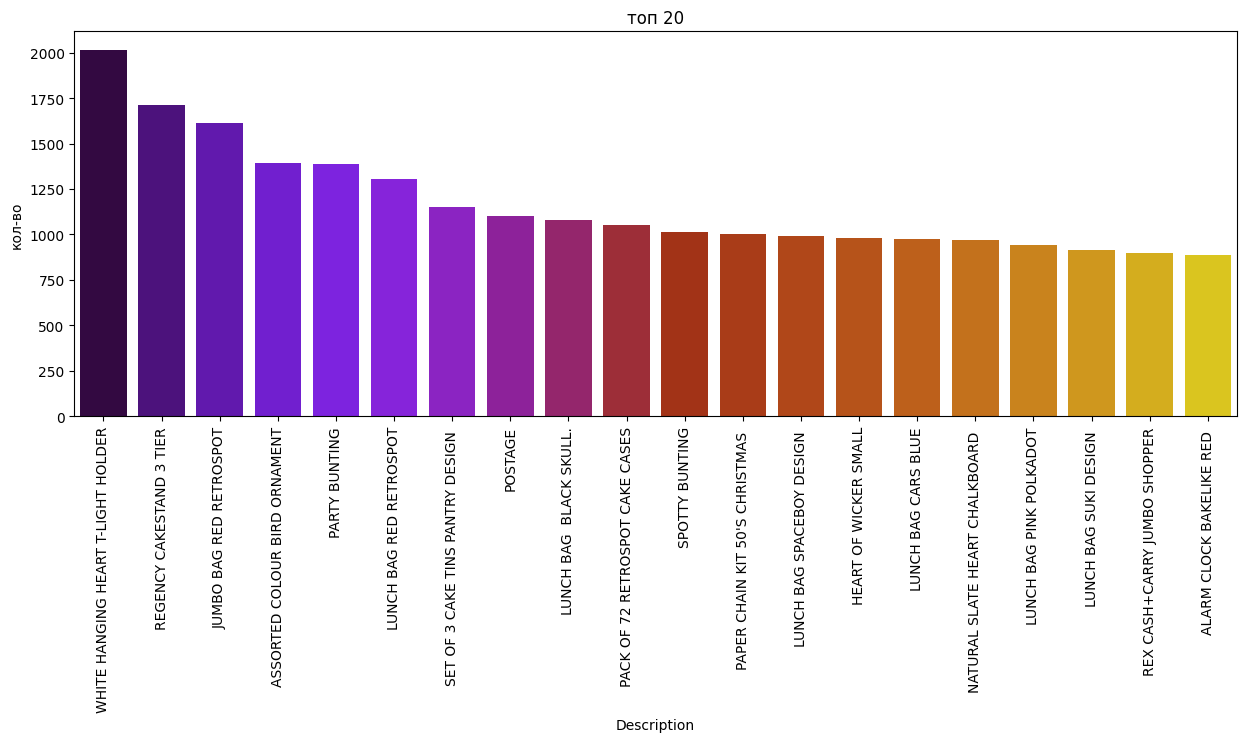

In [16]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.barplot(x = df.Description.value_counts().head(20).index, y = df.Description.value_counts().head(20).values, palette = 'gnuplot')
plt.xlabel('Description')
plt.xticks(rotation=90)
plt.ylabel('кол-во')
plt.title('топ 20')
plt.show()

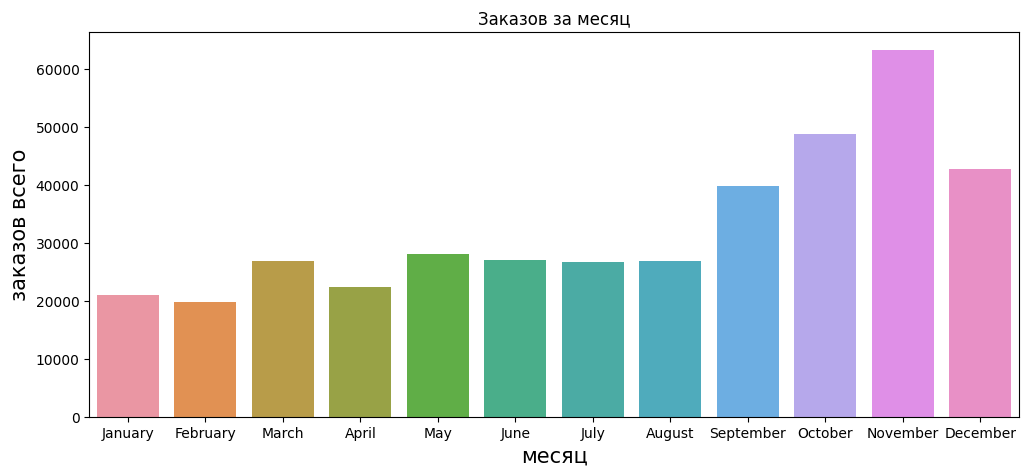

In [17]:
monthTran = df.groupby('month')['Description'].count().reset_index()
monthTran.loc[:,"monthorder"] = [4,8,12,2,1,7,6,3,5,11,10,9]
monthTran.sort_values("monthorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = monthTran, x = "month", y = "Description")
plt.xlabel('месяц', size = 15)
plt.ylabel('заказов всего', size = 15)
plt.title('Заказов за месяц')
plt.show()

Видим, что большинство покупок совершалось в сезон праздников перед рождеством, днем благодарения, черным пятницам и ТД


In [18]:
weekTran = df.groupby('weekday').count()
weekTran

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,time,month,hour
weekday,,,,,,,,,,,,
April,22435,22435,22435,22435,22435,22435,22435,22435,22435,22435,22435,22435
August,26796,26796,26796,26796,26796,26796,26796,26796,26796,26796,26796,26796
December,42699,42699,42699,42699,42699,42699,42699,42699,42699,42699,42699,42699
February,19707,19707,19707,19707,19707,19707,19707,19707,19707,19707,19707,19707
January,20991,20991,20991,20991,20991,20991,20991,20991,20991,20991,20991,20991
July,26582,26582,26582,26582,26582,26582,26582,26582,26582,26582,26582,26582
June,26926,26926,26926,26926,26926,26926,26926,26926,26926,26926,26926,26926
March,26872,26872,26872,26872,26872,26872,26872,26872,26872,26872,26872,26872
May,28075,28075,28075,28075,28075,28075,28075,28075,28075,28075,28075,28075


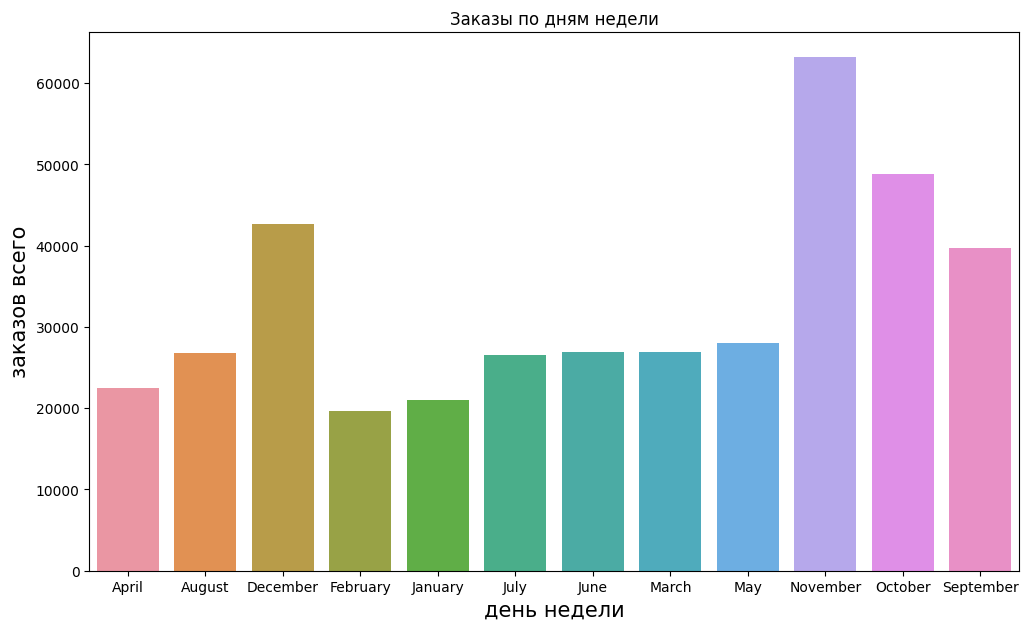

In [19]:
weekTran = df.groupby('weekday')['Description'].count().reset_index()


monthTran.loc[:,"weekorder"] = [4,8,12,2,1,7,6,3,5,11,10,9]
monthTran.sort_values("weekorder",inplace=True)

plt.figure(figsize=(12,7))
sns.barplot(data = weekTran, x = "weekday", y = "Description")
plt.xlabel('день недели', size = 15)
plt.ylabel('заказов всего', size = 15)
plt.title('Заказы по дням недели')
plt.show()

Видим, что большинство заказов как и во всех нормальных drugstore делались к выходным

## Apriori

In [20]:
transactions = df.groupby('InvoiceNo')['Description'].apply(list).tolist()
transactions

[['WHITE HANGING HEART T-LIGHT HOLDER',
  'WHITE METAL LANTERN',
  'CREAM CUPID HEARTS COAT HANGER',
  'KNITTED UNION FLAG HOT WATER BOTTLE',
  'RED WOOLLY HOTTIE WHITE HEART.',
  'SET 7 BABUSHKA NESTING BOXES',
  'GLASS STAR FROSTED T-LIGHT HOLDER'],
 ['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT'],
 ['ASSORTED COLOUR BIRD ORNAMENT',
  "POPPY'S PLAYHOUSE BEDROOM ",
  "POPPY'S PLAYHOUSE KITCHEN",
  'FELTCRAFT PRINCESS CHARLOTTE DOLL',
  'IVORY KNITTED MUG COSY ',
  'BOX OF 6 ASSORTED COLOUR TEASPOONS',
  'BOX OF VINTAGE JIGSAW BLOCKS ',
  'BOX OF VINTAGE ALPHABET BLOCKS',
  'HOME BUILDING BLOCK WORD',
  'LOVE BUILDING BLOCK WORD',
  'RECIPE BOX WITH METAL HEART',
  'DOORMAT NEW ENGLAND'],
 ['JAM MAKING SET WITH JARS',
  'RED COAT RACK PARIS FASHION',
  'YELLOW COAT RACK PARIS FASHION',
  'BLUE COAT RACK PARIS FASHION'],
 ['BATH BUILDING BLOCK WORD'],
 ['ALARM CLOCK BAKELIKE PINK',
  'ALARM CLOCK BAKELIKE RED ',
  'ALARM CLOCK BAKELIKE GREEN',
  'PANDA AND BUNNIES STICKER SHEET'

In [21]:
import sys
import csv
import argparse
import json
import os
from collections import namedtuple
from itertools import combinations
from itertools import chain

class TransactionManager(object):
    """
    Transaction managers.
    """

    def __init__(self, transactions):
        """
        Initialize.

        Arguments:
            transactions -- A transaction iterable object
                            (eg. [['A', 'B'], ['B', 'C']]).
        """
        self.__num_transaction = 0
        self.__items = []
        self.__transaction_index_map = {}

        for transaction in transactions:
            self.add_transaction(transaction)

    def add_transaction(self, transaction):
        """
        Add a transaction.

        Arguments:
            transaction -- A transaction as an iterable object (eg. ['A', 'B']).
        """
        for item in transaction:
            if item not in self.__transaction_index_map:
                self.__items.append(item)
                self.__transaction_index_map[item] = set()
            self.__transaction_index_map[item].add(self.__num_transaction)
        self.__num_transaction += 1

    def calc_support(self, items):
        """
        Returns a support for items.

        Arguments:
            items -- Items as an iterable object (eg. ['A', 'B']).
        """
        # Empty items is supported by all transactions.
        if not items:
            return 1.0

        # Empty transactions supports no items.
        if not self.num_transaction:
            return 0.0

        # Create the transaction index intersection.
        sum_indexes = None
        for item in items:
            indexes = self.__transaction_index_map.get(item)
            if indexes is None:
                # No support for any set that contains a not existing item.
                return 0.0

            if sum_indexes is None:
                # Assign the indexes on the first time.
                sum_indexes = indexes
            else:
                # Calculate the intersection on not the first time.
                sum_indexes = sum_indexes.intersection(indexes)

        # Calculate and return the support.
        return float(len(sum_indexes)) / self.__num_transaction

    def initial_candidates(self):
        """
        Returns the initial candidates.
        """
        return [frozenset([item]) for item in self.items]

    @property
    def num_transaction(self):
        """
        Returns the number of transactions.
        """
        return self.__num_transaction

    @property
    def items(self):
        """
        Returns the item list that the transaction is consisted of.
        """
        return sorted(self.__items)

    @staticmethod
    def create(transactions):
        """
        Create the TransactionManager with a transaction instance.
        If the given instance is a TransactionManager, this returns itself.
        """
        if isinstance(transactions, TransactionManager):
            return transactions
        return TransactionManager(transactions)


# Ignore name errors because these names are namedtuples.
SupportRecord = namedtuple( # pylint: disable=C0103
    'SupportRecord', ('items', 'support'))
RelationRecord = namedtuple( # pylint: disable=C0103
    'RelationRecord', SupportRecord._fields + ('ordered_statistics',))
OrderedStatistic = namedtuple( # pylint: disable=C0103
    'OrderedStatistic', ('items_base', 'items_add', 'confidence', 'lift', 'conviction'))


def create_next_candidates(prev_candidates, length):
    """
    Returns the apriori candidates as a list.

    Arguments:
        prev_candidates -- Previous candidates as a list.
        length -- The lengths of the next candidates.
    """
    # Solve the items.
    items = sorted(frozenset(chain.from_iterable(prev_candidates)))

    # Create the temporary candidates. These will be filtered below.
    tmp_next_candidates = (frozenset(x) for x in combinations(items, length))

    # Return all the candidates if the length of the next candidates is 2
    # because their subsets are the same as items.
    if length < 3:
        return list(tmp_next_candidates)

    # Filter candidates that all of their subsets are
    # in the previous candidates.
    next_candidates = [
        candidate for candidate in tmp_next_candidates
        if all(
            frozenset(x) in prev_candidates
            for x in combinations(candidate, length - 1))
    ]
    return next_candidates


def gen_support_records(transaction_manager, min_support, **kwargs):
    """
    Returns a generator of support records with given transactions.

    Arguments:
        transaction_manager -- Transactions as a TransactionManager instance.
        min_support -- A minimum support (float).

    Keyword arguments:
        max_length -- The maximum length of relations (integer).
    """
    # Parse arguments.
    max_length = kwargs.get('max_length')

    # For testing.
    _create_next_candidates = kwargs.get(
        '_create_next_candidates', create_next_candidates)

    # Process.
    candidates = transaction_manager.initial_candidates()
    length = 1
    while candidates:
        relations = set()
        for relation_candidate in candidates:
            support = transaction_manager.calc_support(relation_candidate)
            if support < min_support:
                continue
            candidate_set = frozenset(relation_candidate)
            relations.add(candidate_set)
            yield SupportRecord(candidate_set, support)
        length += 1
        if max_length and length > max_length:
            break
        candidates = _create_next_candidates(relations, length)


def gen_ordered_statistics(transaction_manager, record):
    """
    Returns a generator of ordered statistics as OrderedStatistic instances.

    Arguments:
        transaction_manager -- Transactions as a TransactionManager instance.
        record -- A support record as a SupportRecord instance.
    """
    items = record.items
    sorted_items = sorted(items)
    for base_length in range(len(items)):
        for combination_set in combinations(sorted_items, base_length):
            items_base = frozenset(combination_set)
            items_add = frozenset(items.difference(items_base))
            confidence = (
                record.support / transaction_manager.calc_support(items_base))
            lift = confidence / transaction_manager.calc_support(items_add)
            conviction = (1 - transaction_manager.calc_support(items_add)) / (1 - confidence) if confidence < 1 else float('inf')
            yield OrderedStatistic(
                frozenset(items_base), frozenset(items_add), confidence, lift, conviction)


def filter_ordered_statistics(ordered_statistics, **kwargs):
    """
    Filter OrderedStatistic objects.

    Arguments:
        ordered_statistics -- A OrderedStatistic iterable object.

    Keyword arguments:
        min_confidence -- The minimum confidence of relations (float).
        min_lift -- The minimum lift of relations (float).
    """
    min_confidence = kwargs.get('min_confidence', 0.0)
    min_lift = kwargs.get('min_lift', 0.0)

    for ordered_statistic in ordered_statistics:
        if ordered_statistic.confidence < min_confidence:
            continue
        if ordered_statistic.lift < min_lift:
            continue
        yield ordered_statistic


def apriori(transactions, **kwargs):
    """
    Executes Apriori algorithm and returns a RelationRecord generator.

    Arguments:
        transactions -- A transaction iterable object
                        (eg. [['A', 'B'], ['B', 'C']]).

    Keyword arguments:
        min_support -- The minimum support of relations (float).
        min_confidence -- The minimum confidence of relations (float).
        min_lift -- The minimum lift of relations (float).
        max_length -- The maximum length of the relation (integer).
    """
    # Parse the arguments.
    min_support = kwargs.get('min_support', 0.1)
    min_confidence = kwargs.get('min_confidence', 0.0)
    min_lift = kwargs.get('min_lift', 0.0)
    max_length = kwargs.get('max_length', None)

    # Check arguments.
    if min_support <= 0:
        raise ValueError('minimum support must be > 0')

    # For testing.
    _gen_support_records = kwargs.get(
        '_gen_support_records', gen_support_records)
    _gen_ordered_statistics = kwargs.get(
        '_gen_ordered_statistics', gen_ordered_statistics)
    _filter_ordered_statistics = kwargs.get(
        '_filter_ordered_statistics', filter_ordered_statistics)

    # Calculate supports.
    transaction_manager = TransactionManager.create(transactions)
    support_records = _gen_support_records(
        transaction_manager, min_support, max_length=max_length)

    # Calculate ordered stats.
    for support_record in support_records:
        ordered_statistics = list(
            _filter_ordered_statistics(
                _gen_ordered_statistics(transaction_manager, support_record),
                min_confidence=min_confidence,
                min_lift=min_lift,
            )
        )
        if not ordered_statistics:
            continue
        yield RelationRecord(
            support_record.items, support_record.support, ordered_statistics)

In [22]:
# Parameters
min_support = 0.01
min_confidence = 0.1
min_lift = 1.0
max_length = None

# Running the apriori algorithm
%time results = list(apriori(transactions, min_support=min_support, min_confidence=min_confidence, min_lift=min_lift, max_length=max_length))

filtered_results = [record for record in results if len(record.items) == 1]
# Printing the association rules in a readable format
for record in filtered_results:
    for ordered_stat in record.ordered_statistics:
        print(f"Rule: {set(ordered_stat.items_base)} -> {set(ordered_stat.items_add)}")
        print(f"Support: {record.support}")
        print(f"Confidence: {ordered_stat.confidence}")
        print(f"Lift: {ordered_stat.lift}")
        print(f"Conviction: {ordered_stat.conviction}")
        print("-" * 100)

CPU times: user 1.53 s, sys: 10.9 ms, total: 1.54 s
Wall time: 1.49 s
Rule: set() -> {'WHITE HANGING HEART T-LIGHT HOLDER'}
Support: 0.10633362106171775
Confidence: 0.10633362106171775
Lift: 1.0
Conviction: 1.0
----------------------------------------------------------------------------------------------------


In [23]:
filtered_results = [record for record in results if len(record.items) == 2]
# Printing the association rules in a readable format
for record in filtered_results:
    for ordered_stat in record.ordered_statistics:
        print(f"Rule: {set(ordered_stat.items_base)} -> {set(ordered_stat.items_add)}")
        print(f"Support: {record.support}")
        print(f"Confidence: {ordered_stat.confidence}")
        print(f"Lift: {ordered_stat.lift}")
        print(f"Conviction: {ordered_stat.conviction}")
        print("-" * 100)

Rule: {'60 CAKE CASES DOLLY GIRL DESIGN'} -> {'PACK OF 72 RETROSPOT CAKE CASES'}
Support: 0.010196374622356496
Confidence: 0.5338983050847458
Lift: 9.617433414043584
Conviction: 2.0263526503707774
----------------------------------------------------------------------------------------------------
Rule: {'PACK OF 72 RETROSPOT CAKE CASES'} -> {'60 CAKE CASES DOLLY GIRL DESIGN'}
Support: 0.010196374622356496
Confidence: 0.18367346938775508
Lift: 9.617433414043582
Conviction: 1.2016049848942598
----------------------------------------------------------------------------------------------------
Rule: {'60 CAKE CASES VINTAGE CHRISTMAS'} -> {'SET OF 20 VINTAGE CHRISTMAS NAPKINS'}
Support: 0.010088476478204576
Confidence: 0.40128755364806873
Lift: 15.211178107199594
Conviction: 1.6261878464149198
----------------------------------------------------------------------------------------------------
Rule: {'SET OF 20 VINTAGE CHRISTMAS NAPKINS'} -> {'60 CAKE CASES VINTAGE CHRISTMAS'}
Support: 0.010

In [24]:
filtered_results = [record for record in results if len(record.items) == 3]
# Printing the association rules in a readable format
for record in filtered_results:
    for ordered_stat in record.ordered_statistics:
        print(f"Rule: {set(ordered_stat.items_base)} -> {set(ordered_stat.items_add)}")
        print(f"Support: {record.support}")
        print(f"Confidence: {ordered_stat.confidence}")
        print(f"Lift: {ordered_stat.lift}")
        print(f"Conviction: {ordered_stat.conviction}")
        print("-" * 100)

Rule: {'ALARM CLOCK BAKELIKE GREEN'} -> {'ALARM CLOCK BAKELIKE IVORY', 'ALARM CLOCK BAKELIKE RED '}
Support: 0.011599050496331463
Confidence: 0.27249683143219267
Lift: 16.08599129753861
Conviction: 1.3512793261140579
----------------------------------------------------------------------------------------------------
Rule: {'ALARM CLOCK BAKELIKE IVORY'} -> {'ALARM CLOCK BAKELIKE RED ', 'ALARM CLOCK BAKELIKE GREEN'}
Support: 0.011599050496331463
Confidence: 0.4594017094017094
Lift: 16.0669246895662
Conviction: 1.796910957163157
----------------------------------------------------------------------------------------------------
Rule: {'ALARM CLOCK BAKELIKE RED '} -> {'ALARM CLOCK BAKELIKE IVORY', 'ALARM CLOCK BAKELIKE GREEN'}
Support: 0.011599050496331463
Confidence: 0.24515393386545042
Lift: 16.52426661138178
Conviction: 1.3051190823898495
----------------------------------------------------------------------------------------------------
Rule: {'ALARM CLOCK BAKELIKE IVORY', 'ALARM CLOCK

In [25]:
# Let's print the association rules in a readable format
for record in results:
    for ordered_stat in record.ordered_statistics:
        print(f"Rule: {set(ordered_stat.items_base)} -> {set(ordered_stat.items_add)}")
        print(f"Support: {record.support}")
        print(f"Confidence: {ordered_stat.confidence}")
        print(f"Lift: {ordered_stat.lift}")
        print("-" * 40)

Rule: set() -> {'WHITE HANGING HEART T-LIGHT HOLDER'}
Support: 0.10633362106171775
Confidence: 0.10633362106171775
Lift: 1.0
----------------------------------------
Rule: {'60 CAKE CASES DOLLY GIRL DESIGN'} -> {'PACK OF 72 RETROSPOT CAKE CASES'}
Support: 0.010196374622356496
Confidence: 0.5338983050847458
Lift: 9.617433414043584
----------------------------------------
Rule: {'PACK OF 72 RETROSPOT CAKE CASES'} -> {'60 CAKE CASES DOLLY GIRL DESIGN'}
Support: 0.010196374622356496
Confidence: 0.18367346938775508
Lift: 9.617433414043582
----------------------------------------
Rule: {'60 CAKE CASES VINTAGE CHRISTMAS'} -> {'SET OF 20 VINTAGE CHRISTMAS NAPKINS'}
Support: 0.010088476478204576
Confidence: 0.40128755364806873
Lift: 15.211178107199594
----------------------------------------
Rule: {'SET OF 20 VINTAGE CHRISTMAS NAPKINS'} -> {'60 CAKE CASES VINTAGE CHRISTMAS'}
Support: 0.010088476478204576
Confidence: 0.38241308793456036
Lift: 15.211178107199595
----------------------------------

## FP-Growth

In [41]:
# FP-Growth specific classes and functions
class FPTreeNode:
    def __init__(self, item, count, parent):
        self.item = item
        self.count = count
        self.parent = parent
        self.children = {}
        self.node_link = None

def update_tree(items, root, header_table):
    if items:
        first_item = items[0]
        if first_item in root.children:
            root.children[first_item].count += 1
        else:
            root.children[first_item] = FPTreeNode(first_item, 1, root)
            if header_table[first_item][1] is None:
                header_table[first_item][1] = root.children[first_item]
            else:
                current_node = header_table[first_item][1]
                while current_node.node_link is not None:
                    current_node = current_node.node_link
                current_node.node_link = root.children[first_item]
        remaining_items = items[1:]
        update_tree(remaining_items, root.children[first_item], header_table)

def create_fp_tree(transactions, min_support):
    header_table = {}
    # Первый проход: Подсчет частоты каждого элемента.
    for transaction in transactions:
        for item in transaction:
            header_table[item] = header_table.get(item, 0) + 1

    # Удаление элементов, которые не удовлетворяют минимальной поддержке.
    header_table = {k: [v, None] for k, v in header_table.items() if v >= min_support}
    
    if len(header_table) == 0:
        return None, None

    print("Header Table:", header_table)  # Отладочный вывод

    # Второй проход: Создание FP-дерева.
    root = FPTreeNode(None, 1, None)

    for transaction in transactions:
        # Отфильтровать и отсортировать элементы транзакции по убыванию их частоты.
        sorted_items = [item for item in sorted(transaction, key=lambda item: header_table[item][0], reverse=True) if item in header_table]
        print("Transaction:", transaction)  # Отладочный вывод
        print("Sorted Items:", sorted_items)  # Отладочный вывод
        # Обновление FP-дерева
        update_tree(sorted_items, root, header_table)

    return root, header_table



def gen_support_records_fp_growth(transaction_manager, min_support, **kwargs):
    max_length = kwargs.get('max_length')

    # Преобразование транзакций для FP-роста
    transactions = []
    for transaction in transaction_manager:
        transaction = [item for item in transaction if item in transaction_manager.items]
        transactions.append(transaction)

    min_support_count = min_support * transaction_manager.num_transaction
    fp_tree, header_table = create_fp_tree(transactions, min_support_count)

    if fp_tree is None:
        return


def mine_fp_tree(header_table, min_support, prefix, freq_item_list):
    sorted_items = [item[0] for item in sorted(header_table.items(), key=lambda p: p[1][0])]
    for base_item in sorted_items:
        new_freq_set = prefix.copy()
        new_freq_set.add(base_item)
        freq_item_list.append(new_freq_set)
        cond_pattern_base = find_prefix_path(base_item, header_table)
        cond_tree, cond_header = create_fp_tree(cond_pattern_base, min_support)

        if cond_header is not None:
            mine_fp_tree(cond_header, min_support, new_freq_set, freq_item_list)


def find_prefix_path(base_item, header_table):
    cond_patterns = []
    node = header_table[base_item][1]
    while node is not None:
        prefix_path = []
        ascend_tree(node, prefix_path)
        if len(prefix_path) > 1:
            cond_patterns.extend([prefix_path[1:]] * node.count)
        node = node.link
    return cond_patterns


def ascend_tree(node, prefix_path):
    if node.parent is not None:
        prefix_path.append(node.item)
        ascend_tree(node.parent, prefix_path)


def gen_support_records_fp_growth(transaction_manager, min_support, **kwargs):
    transactions = []
    for i in range(transaction_manager.num_transaction):
        transaction = [item for item in transaction_manager.items if i in transaction_manager._TransactionManager__transaction_index_map[item]]
        transactions.append(transaction)

    min_support_count = min_support * transaction_manager.num_transaction
    fp_tree, header_table = create_fp_tree(transactions, min_support_count)

    if fp_tree is None:
        return

    freq_item_list = []
    mine_fp_tree(header_table, min_support_count, set(), freq_item_list)

    for itemset in freq_item_list:
        support = transaction_manager.calc_support(itemset)
        yield SupportRecord(itemset, support)


# Ignore name errors because these names are namedtuples.
SupportRecord = namedtuple('SupportRecord', ('items', 'support'))
RelationRecord = namedtuple('RelationRecord', SupportRecord._fields + ('ordered_statistics',))
OrderedStatistic = namedtuple('OrderedStatistic', ('items_base', 'items_add', 'confidence', 'lift', 'conviction'))

def fp_growth(transactions, **kwargs):
    """
    Executes FP-Growth algorithm and returns a RelationRecord generator.

    Arguments:
        transactions -- A transaction iterable object
                        (eg. [['A', 'B'], ['B', 'C']]).

    Keyword arguments:
        min_support -- The minimum support of relations (float).
        min_confidence -- The minimum confidence of relations (float).
        min_lift -- The minimum lift of relations (float).
        max_length -- The maximum length of the relation (integer).
    """
    # Parse the arguments.
    min_support = kwargs.get('min_support', 0.01)
    min_confidence = kwargs.get('min_confidence', 0.01)
    min_lift = kwargs.get('min_lift', 0.01)
    max_length = kwargs.get('max_length', None)

    # Check arguments.
    if min_support <= 0:
        raise ValueError('minimum support must be > 0')

    # For testing.
    _gen_support_records = kwargs.get(
        '_gen_support_records', gen_support_records_fp_growth)
    _gen_ordered_statistics = kwargs.get(
        '_gen_ordered_statistics', gen_ordered_statistics)
    _filter_ordered_statistics = kwargs.get(
        '_filter_ordered_statistics', filter_ordered_statistics)

    # Calculate supports.
    transaction_manager = TransactionManager.create(transactions)
    support_records = _gen_support_records(
        transaction_manager, min_support, max_length=max_length)

    # Calculate ordered stats.
    for support_record in support_records:
        ordered_statistics = list(
            _filter_ordered_statistics(
                _gen_ordered_statistics(transaction_manager, support_record),
                min_confidence=min_confidence,
                min_lift=min_lift,
            )
        )
        if not ordered_statistics:
            continue
        yield RelationRecord(
            support_record.items, support_record.support, ordered_statistics)

In [42]:
min_support = 0.01
min_confidence = 0.01

# Генерация ассоциативных правил
results = fp_growth(transactions)

# Фильтрация результатов по длине набора
filtered_results = [record for record in results if len(record.items)]

# Вывод правил в удобном формате
for record in filtered_results:
    for ordered_stat in record.ordered_statistics:
        print(f"Rule: {set(ordered_stat.items_base)} -> {set(ordered_stat.items_add)}")
        print(f"Support: {record.support}")
        print(f"Confidence: {ordered_stat.confidence}")
        print(f"Lift: {ordered_stat.lift}")
        print(f"Conviction: {ordered_stat.conviction}")
        print("-" * 100)

Header Table: {'CREAM CUPID HEARTS COAT HANGER': [241, None], 'KNITTED UNION FLAG HOT WATER BOTTLE': [319, None], 'RED WOOLLY HOTTIE WHITE HEART.': [321, None], 'SET 7 BABUSHKA NESTING BOXES': [297, None], 'WHITE HANGING HEART T-LIGHT HOLDER': [1971, None], 'WHITE METAL LANTERN': [238, None], 'HAND WARMER UNION JACK': [441, None], 'ASSORTED COLOUR BIRD ORNAMENT': [1375, None], 'BOX OF VINTAGE ALPHABET BLOCKS': [231, None], 'BOX OF VINTAGE JIGSAW BLOCKS ': [219, None], 'DOORMAT NEW ENGLAND': [531, None], 'FELTCRAFT PRINCESS CHARLOTTE DOLL': [401, None], 'HOME BUILDING BLOCK WORD': [691, None], 'LOVE BUILDING BLOCK WORD': [555, None], "POPPY'S PLAYHOUSE BEDROOM ": [316, None], "POPPY'S PLAYHOUSE KITCHEN": [346, None], 'JAM MAKING SET WITH JARS': [879, None], 'BATH BUILDING BLOCK WORD': [242, None], ' SET 2 TEA TOWELS I LOVE LONDON ': [192, None], 'ALARM CLOCK BAKELIKE GREEN': [789, None], 'ALARM CLOCK BAKELIKE PINK': [613, None], 'ALARM CLOCK BAKELIKE RED ': [877, None], 'CHARLOTTE BAG D

KeyError: 'GLASS STAR FROSTED T-LIGHT HOLDER'